In [4]:
import numpy as np
import matplotlib.pyplot as plt


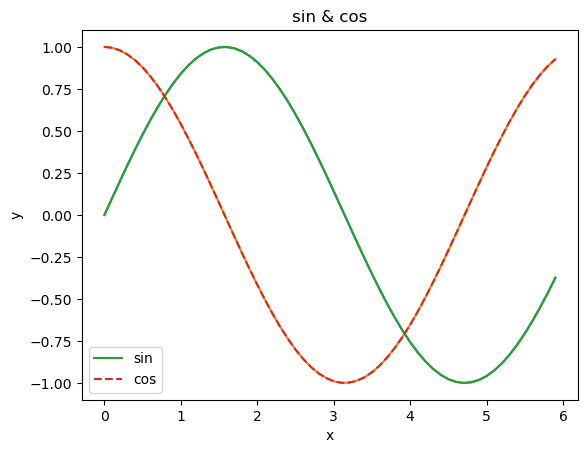

In [5]:
# 生成数据
x = np.arange(0, 6, 0.1) # 以0.1为单位，生成0到6的数据
y1 = np.sin(x)
y2 = np.cos(x)

plt.plot(x, y1)
plt.plot(x, y2)
plt.plot(x, y1, label="sin")
plt.plot(x, y2, linestyle = "--", label="cos") # 用虚线绘制
plt.xlabel("x")
plt.ylabel("y")
plt.title('sin & cos')
plt.legend()
plt.show()

# 第2章 感知机
- 感知机可以表示与门、与非门、或门
- 感知机不能表示异或门

一组感知机有w1, w2, b三个参数，对于两个x1, x2输入，表示的是一条直线

- 组合感知机通过叠加层表示异或门。实际就是使用与门、与非门、或门表示异或门

In [6]:
# 与门
def AND(x1, x2):
    w1, w2, theta = 0.5, 0.5, 0.7
    tmp = w1 * x1 + w2 * x2
    if tmp <= theta:
        return False
    elif tmp > theta:
        return True
AND(0, 0) # 输出0
AND(1, 0) # 输出0
AND(0, 1) # 输出0
AND(1, 1) # 输出1

True

令 `b=-theta`
将$b$称为**偏置**，$w1$和$w2$称为**权重**
w1和w2是控制输入信号的重要性的参数，而偏置是调整神经元被激活的容易程度

In [9]:
# 与门（使用numpy） 使用权重和偏置的实现
def AND(x1, x2):
    x = np.array([x1, x2])
    w = np.array([0.5, 0.5])
    b = -0.7
    return np.sum(x * w) + b > 0
AND(0, 0) # 输出0
AND(1, 0) # 输出0
AND(0, 1) # 输出0
AND(1, 1) # 输出1

# 与非门
def NAND(x1, x2):
    x = np.array([x1, x2])
    w = np.array([-0.5, -0.5])
    return np.sum(x * w) - 0.7 > 0

def OR(x1, x2):
    x = np.array([x1, x2])
    w = np.array([0.5, 0.5])
    return np.sum(x * w) - 0.2 > 0


True

In [10]:
# 异或门
def XOR(x1, x2):
    s1 = NAND(x1, x2)
    s2 = OR(x1, x2)
    y = AND(s1, s2)
    return y